## This script contains the following points:¶

1. Import libraries and data sets.
2. Run a PCA on reduced data.
3. Hierarchical clustering with reduced PCA components.

### 1. Import libraries and data sets.

In [25]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Establish path.

path = r'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 2'
path

'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 2'

In [4]:
# Import unscaled temperatures data set.

df_temps99 = pd.read_csv(os.path.join(path, 'Data Sets', 'meantemps_unscaled_1999.csv'), index_col = 0)
df_temps99

,DATE,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
14245,1999-01-01,0.3,0.1,-3.1,5.8,5.6,9.2,0.6,0.1,7.8,5.0,-0.4,0.3,-10.0,0.5,7.9
14246,1999-01-02,2.8,3.8,-1.2,6.4,6.2,8.3,2.4,1.1,7.2,3.6,1.1,0.5,-8.7,1.1,7.9
14247,1999-01-03,7.8,3.6,2.9,5.6,5.9,8.8,4.4,2.5,6.0,4.4,7.0,2.3,-9.4,2.3,9.1
14248,1999-01-04,9.2,1.4,3.9,10.1,10.5,9.9,8.1,2.4,10.6,3.8,8.8,1.8,-7.8,2.1,10.0
14249,1999-01-05,9.7,4.5,2.3,11.5,12.2,12.4,10.4,0.5,12.5,8.0,7.4,0.4,-2.8,2.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1999-12-27,5.0,4.1,4.0,3.8,3.1,3.2,1.5,2.8,3.2,11.4,2.2,0.7,-14.3,1.0,4.8
14606,1999-12-28,2.4,4.7,0.6,1.5,2.6,3.4,1.5,0.9,2.3,7.6,-0.1,-0.8,-14.9,-0.4,5.3
14607,1999-12-29,1.8,2.0,1.6,3.2,2.8,2.0,2.1,-2.0,2.3,3.4,-0.4,-3.5,-18.2,-2.1,7.1
14608,1999-12-30,1.1,0.3,1.8,2.9,3.4,3.4,1.2,-3.5,2.5,3.3,-0.6,-9.4,-18.8,-6.6,8.4


In [6]:
# Reset index.

df_temps99 = df_temps99.reset_index(drop=True)
df_temps99

,DATE,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,1999-01-01,0.3,0.1,-3.1,5.8,5.6,9.2,0.6,0.1,7.8,5.0,-0.4,0.3,-10.0,0.5,7.9
1,1999-01-02,2.8,3.8,-1.2,6.4,6.2,8.3,2.4,1.1,7.2,3.6,1.1,0.5,-8.7,1.1,7.9
2,1999-01-03,7.8,3.6,2.9,5.6,5.9,8.8,4.4,2.5,6.0,4.4,7.0,2.3,-9.4,2.3,9.1
3,1999-01-04,9.2,1.4,3.9,10.1,10.5,9.9,8.1,2.4,10.6,3.8,8.8,1.8,-7.8,2.1,10.0
4,1999-01-05,9.7,4.5,2.3,11.5,12.2,12.4,10.4,0.5,12.5,8.0,7.4,0.4,-2.8,2.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1999-12-27,5.0,4.1,4.0,3.8,3.1,3.2,1.5,2.8,3.2,11.4,2.2,0.7,-14.3,1.0,4.8
361,1999-12-28,2.4,4.7,0.6,1.5,2.6,3.4,1.5,0.9,2.3,7.6,-0.1,-0.8,-14.9,-0.4,5.3
362,1999-12-29,1.8,2.0,1.6,3.2,2.8,2.0,2.1,-2.0,2.3,3.4,-0.4,-3.5,-18.2,-2.1,7.1
363,1999-12-30,1.1,0.3,1.8,2.9,3.4,3.4,1.2,-3.5,2.5,3.3,-0.6,-9.4,-18.8,-6.6,8.4


In [12]:
# Import unscaled pleasant weather data set.

df_pw99 = pd.read_csv(os.path.join(path, 'Data Sets', 'pleasantweather_unscaled_1999.csv'), index_col = 0)
df_pw99

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14245,1999-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14246,1999-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14247,1999-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14248,1999-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14249,1999-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1999-12-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14606,1999-12-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14607,1999-12-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14608,1999-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Reset index.

df_pw99 = df_pw99.reset_index(drop=True)
df_pw99

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1999-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1999-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1999-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1999-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1999-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1999-12-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,1999-12-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,1999-12-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
363,1999-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2. Run PCA on reduced data.

In [14]:
# Get list of columns that are not dates for scaling.

df_temps_scaling = [x for x in df_temps99.columns if "_" in x]
df_temps_scaling

['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']

In [15]:
temps_columns = ['BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
'VALENTIA_temp_mean']

In [16]:
# Create scaler object using StandardScaler from sklearn.preprocessing.

scaler = StandardScaler()

In [18]:
# Scale temperature data from 1999.

df_temps99_scaled = pd.DataFrame(scaler.fit_transform(df_temps99[df_temps_scaling]), columns = temps_columns)
df_temps99_scaled

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-1.471097,-1.457203,-1.741057,-0.849693,-0.868288,-0.504780,-1.341126,-1.300327,-0.499132,-1.285300,-1.294391,-0.836601,-0.786616,-0.926793,-0.960341
1,-1.126483,-1.022498,-1.517045,-0.750518,-0.778094,-0.669776,-1.081996,-1.181306,-0.590628,-1.466914,-1.103752,-0.811123,-0.602876,-0.855200,-0.960341
2,-0.437254,-1.045996,-1.033652,-0.882751,-0.823191,-0.578112,-0.794074,-1.014677,-0.773619,-1.363135,-0.353908,-0.581817,-0.701813,-0.712013,-0.619502
3,-0.244270,-1.304469,-0.915751,-0.138936,-0.131707,-0.376451,-0.261418,-1.026579,-0.072152,-1.440969,-0.125142,-0.645513,-0.475672,-0.735877,-0.363873
4,-0.175347,-0.940257,-1.104392,0.092473,0.123841,0.081870,0.069693,-1.252719,0.217584,-0.896128,-0.303071,-0.823862,0.231021,-0.664284,-0.761518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-0.823222,-0.987252,-0.903961,-1.180278,-1.244094,-1.604750,-1.211561,-0.978971,-1.200599,-0.455065,-0.963951,-0.785644,-1.394372,-0.867132,-1.840841
361,-1.181621,-0.916759,-1.304824,-1.560450,-1.319255,-1.568084,-1.211561,-1.205111,-1.337843,-0.948017,-1.256263,-0.976733,-1.479175,-1.034184,-1.698825
362,-1.264328,-1.233976,-1.186923,-1.279453,-1.289191,-1.824744,-1.125184,-1.550271,-1.337843,-1.492859,-1.294391,-1.320692,-1.945592,-1.237032,-1.187567
363,-1.360820,-1.433705,-1.163343,-1.329041,-1.198997,-1.568084,-1.254749,-1.728802,-1.307344,-1.505831,-1.319809,-2.072307,-2.030395,-1.773984,-0.818325


In [20]:
#Run the PCA model, reducing to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_temps99_scaled)

In [21]:
principalComponents

array([[ 4.15949611e+00,  1.01240051e+00],
       [ 3.74272318e+00,  5.76571939e-01],
       [ 3.01598036e+00,  3.32254914e-01],
       [ 2.10139373e+00,  8.99383736e-01],
       [ 1.54099882e+00,  8.90880879e-01],
       [ 1.84681040e+00,  5.19254910e-01],
       [ 2.86502564e+00, -3.48785438e-01],
       [ 3.52015948e+00, -7.44059690e-01],
       [ 4.65360551e+00, -7.68890811e-01],
       [ 5.89337335e+00, -1.34930764e+00],
       [ 6.01129291e+00, -1.51279803e+00],
       [ 6.01698693e+00, -1.40823181e+00],
       [ 4.94715354e+00, -3.13878049e-01],
       [ 4.42838523e+00,  1.31101269e-01],
       [ 3.51947275e+00,  6.44506682e-01],
       [ 2.95610933e+00, -2.55948513e-01],
       [ 3.23814977e+00, -3.79260554e-01],
       [ 3.43192494e+00,  1.68239454e-01],
       [ 3.18577397e+00,  1.29124030e+00],
       [ 2.93220370e+00,  1.56313318e+00],
       [ 3.60356880e+00,  8.69694307e-01],
       [ 4.43242270e+00,  4.08146750e-01],
       [ 4.31606964e+00,  9.85859989e-01],
       [ 3.

In [22]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2'])

In [23]:
dfPCA

,PCA1,PCA2
0,4.159496,1.012401
1,3.742723,0.576572
2,3.015980,0.332255
3,2.101394,0.899384
4,1.540999,0.890881
...,...,...
360,4.232870,-0.659319
361,4.900786,-0.455744
362,5.303040,-0.014757
363,5.640466,0.186967


### 3. Hierarchical clustering with reduced PCA components.

In [26]:
# Generate the linkage matrix for average method.

Z = linkage(dfPCA, 'average')

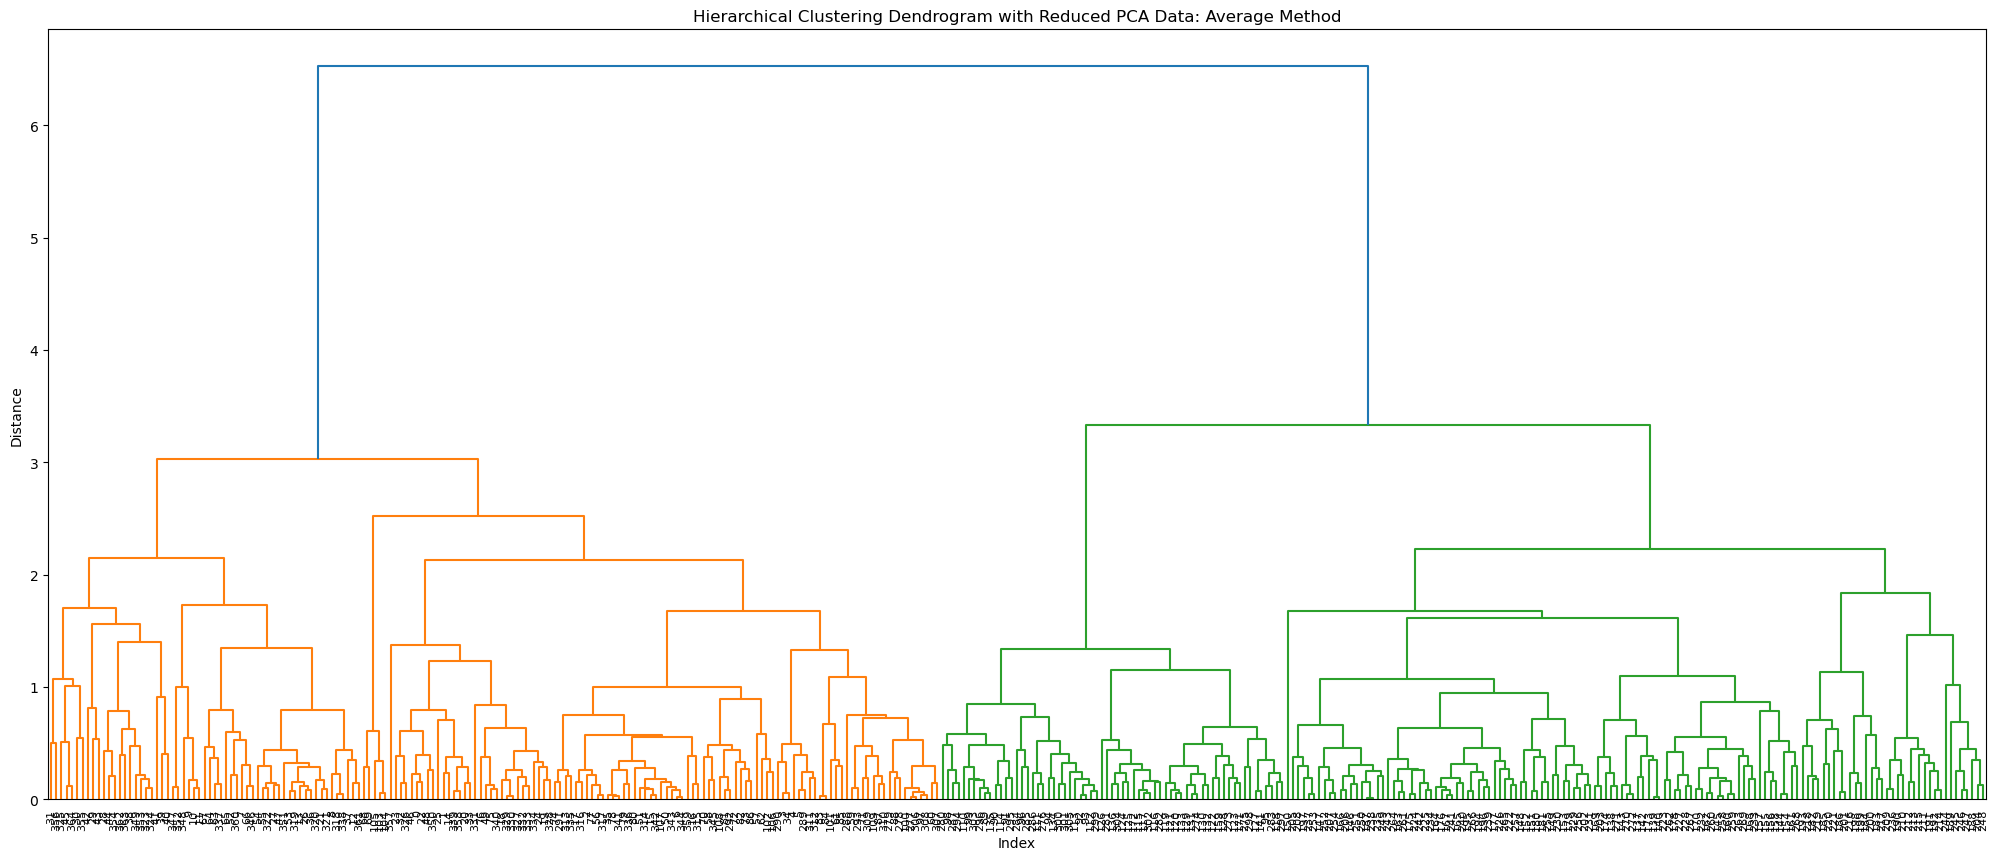

In [27]:
# Calculate dendrogram using average method.

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram with Reduced PCA Data: Average Method')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [28]:
# Assign clusters to each row in dfPCA.

dfPCA['clust2']=fcluster(Z,2, criterion='maxclust')
dfPCA['clust3']=fcluster(Z,3, criterion='maxclust')
dfPCA.head()

,PCA1,PCA2,clust2,clust3
0,4.159496,1.012401,1,1
1,3.742723,0.576572,1,1
2,3.015980,0.332255,1,1
3,2.101394,0.899384,1,1
4,1.540999,0.890881,1,1


In [30]:
dfPCA['clust2'].value_counts(dropna=False)

clust2
2    197
1    168
Name: count, dtype: int64

In [31]:
dfPCA['clust3'].value_counts(dropna=False)

clust3
1    168
3    132
2     65
Name: count, dtype: int64

In [32]:
dfPCA['madrid_label'] = df_pw99['MADRID_pleasant_weather']
dfPCA

,PCA1,PCA2,clust2,clust3,madrid_label
0,4.159496,1.012401,1,1,0
1,3.742723,0.576572,1,1,0
2,3.015980,0.332255,1,1,0
3,2.101394,0.899384,1,1,0
4,1.540999,0.890881,1,1,0
...,...,...,...,...,...
360,4.232870,-0.659319,1,1,0
361,4.900786,-0.455744,1,1,0
362,5.303040,-0.014757,1,1,0
363,5.640466,0.186967,1,1,0


<Axes: title={'center': 'Madrid Pleasant Weather'}, xlabel='PCA1', ylabel='PCA2'>

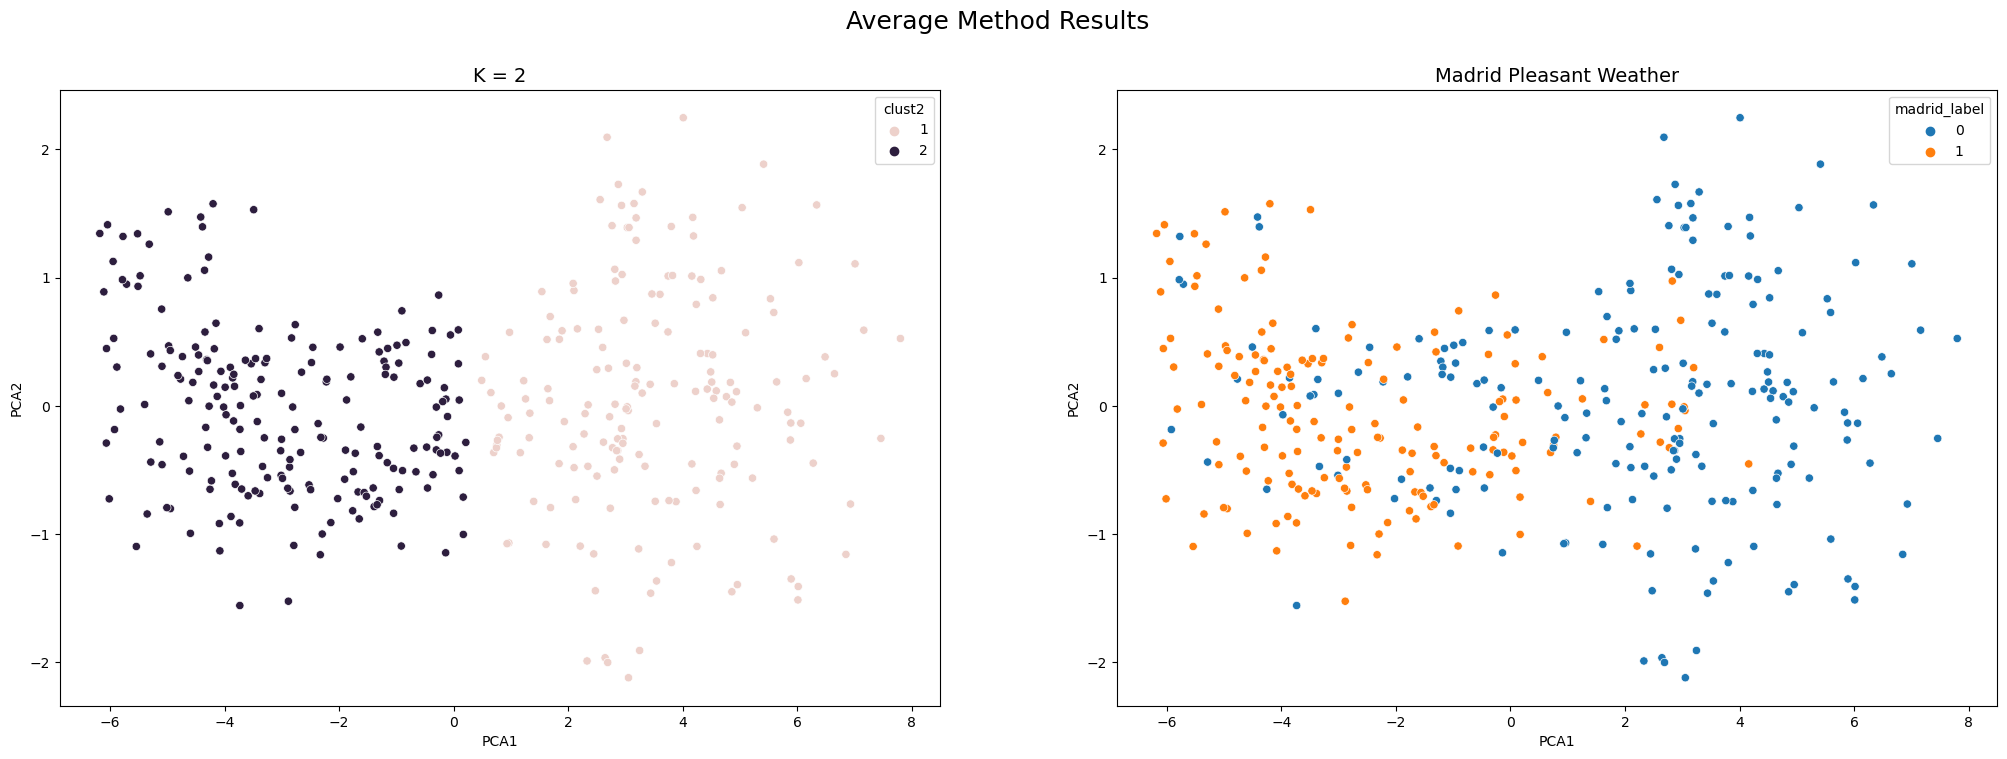

In [34]:
#plot the clusters against the answers.

plt.figure(figsize=(25,8))

plt.suptitle("Average Method Results",fontsize=18)

plt.subplot(1, 2, 1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA, hue="clust2")

plt.subplot(1, 2, 2)
plt.title("Madrid Pleasant Weather",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA, hue="madrid_label")

In [35]:
dfPCA['ljubljana_label'] = df_pw99['LJUBLJANA_pleasant_weather']
dfPCA

,PCA1,PCA2,clust2,clust3,madrid_label,ljubljana_label
0,4.159496,1.012401,1,1,0,0
1,3.742723,0.576572,1,1,0,0
2,3.015980,0.332255,1,1,0,0
3,2.101394,0.899384,1,1,0,0
4,1.540999,0.890881,1,1,0,0
...,...,...,...,...,...,...
360,4.232870,-0.659319,1,1,0,0
361,4.900786,-0.455744,1,1,0,0
362,5.303040,-0.014757,1,1,0,0
363,5.640466,0.186967,1,1,0,0


<Axes: title={'center': 'Ljubljana Pleasant Weather'}, xlabel='PCA1', ylabel='PCA2'>

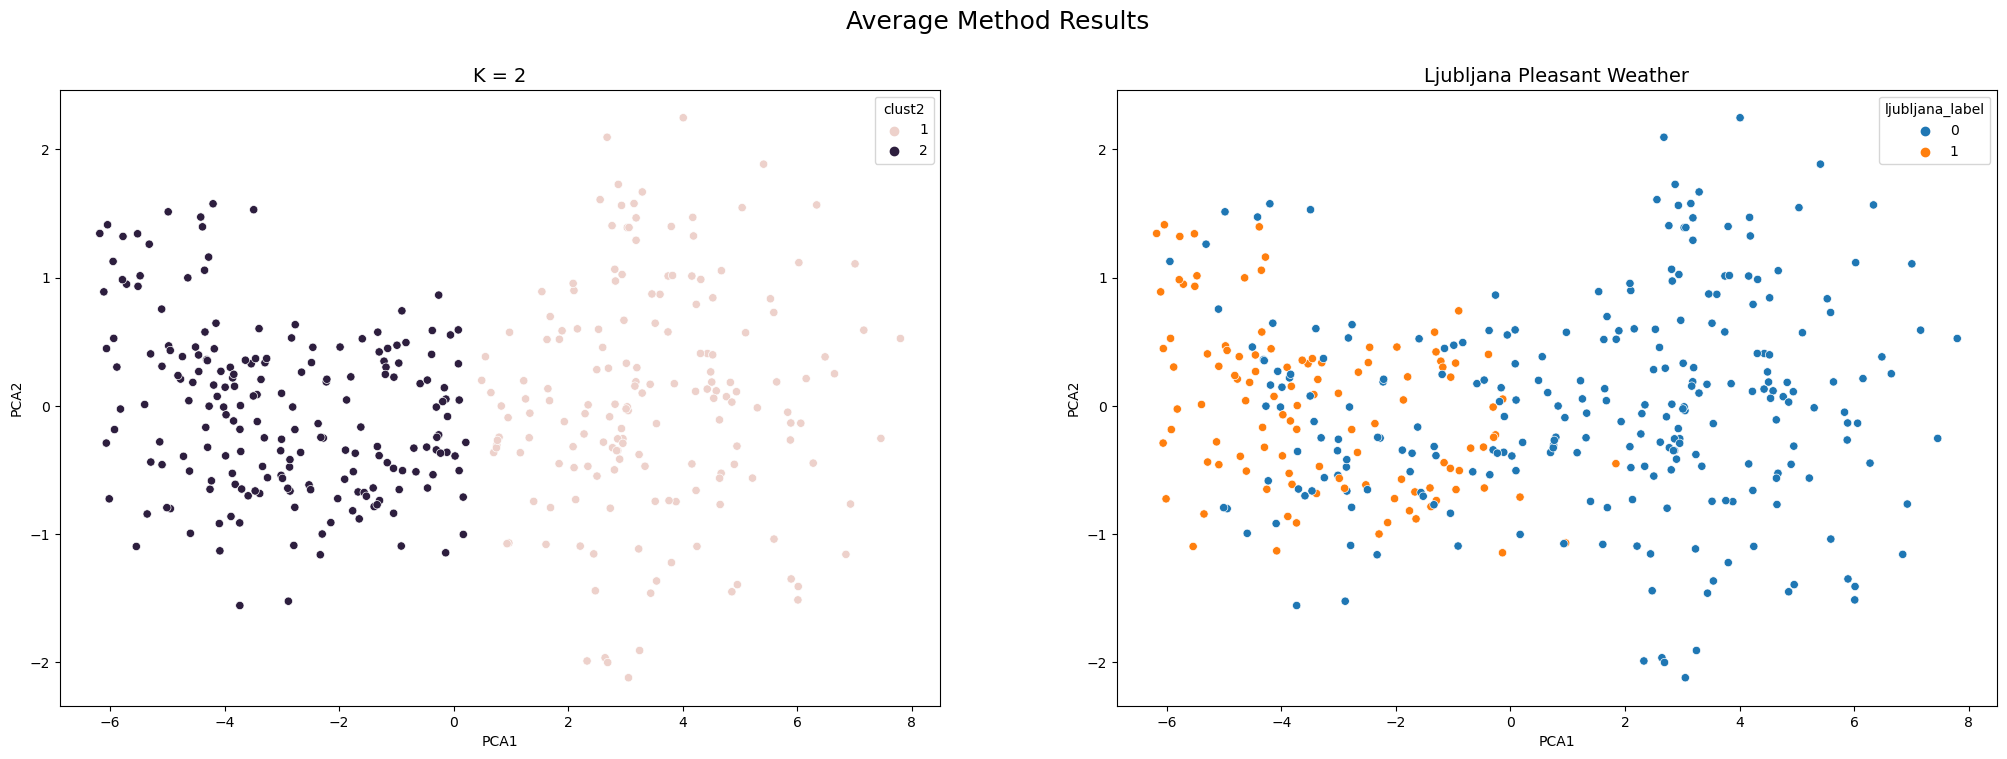

In [37]:
#plot the clusters against the answers.

plt.figure(figsize=(25,8))

plt.suptitle("Average Method Results",fontsize=18)

plt.subplot(1, 2, 1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA, hue="clust2")

plt.subplot(1, 2, 2)
plt.title("Ljubljana Pleasant Weather",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=dfPCA, hue="ljubljana_label")